### Loss function and metrics analysis for training and validation

The Dice Loss and Jaccard Index doesn't work with a void mask. Therefore, we have to find a solution to this problem.

Tackle the problem described in fix_IoU_and_loss_correlation.ipynb 

Confusion matrix:\
Dice Loss:\
Jaccard Index:


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchmetrics.classification import BinaryJaccardIndex
import segmentation_models_pytorch as smp
import torch

In [3]:
gt = np.zeros((3, 3))
gt[1, 1] = 1

print("Ground-Truth-Array:")
print(gt)

Ground-Truth-Array:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [4]:
pred = np.copy(gt)
pred[0, 0] = 0

print("Prediction:")
print(pred)

Vorhersage:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [38]:
pred_off = np.copy(gt)  
pred_off[0, 1] = 1
pred_off_tensor = torch.from_numpy(pred_off)

In [46]:
pred_beside = np.copy(gt)
pred_beside[1, 1] = 0
pred_beside[0, 1] = 1
pred_beside_tensor = torch.from_numpy(pred_beside)

In [8]:
pred_tensor = torch.from_numpy(pred)
gt_tensor = torch.from_numpy(gt)

In [15]:
metric = BinaryJaccardIndex()
loss_fn = smp.losses.DiceLoss(mode="binary", log_loss=False, from_logits=False)

In [18]:
IoU = metric(pred_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_tensor, gt_tensor).cpu().numpy()
print("IoU:", IoU)
print("Dice Loss:", dice_loss)

IoU: 1.0
Dice Loss: 0.0


In [22]:
void_gt = np.zeros((3, 3))
void_gt_tensor = torch.from_numpy(void_gt)

viod_pred = np.copy(void_gt)
viod_pred_tensor = torch.from_numpy(viod_pred)

In [23]:
IoU = metric(viod_pred_tensor, void_gt_tensor).cpu().numpy()
dice_loss = loss_fn(viod_pred_tensor, void_gt_tensor).cpu().numpy()
print("IoU:", IoU)
print("Dice Loss:", dice_loss)

IoU: nan
Dice Loss: 0.0


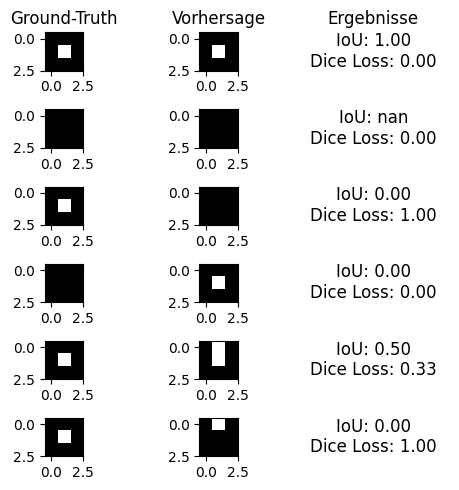

In [47]:
fig, axs = plt.subplots(6, 3, figsize=(5, 5))
axs[0, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[0, 0].set_title('Ground-Truth')
axs[0, 1].imshow(pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_tensor,  gt_tensor).cpu().numpy()
axs[0, 1].set_title('Vorhersage')
axs[0, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}', fontsize=12, ha='center', va='center')
axs[0, 2].axis('off')
axs[0, 2].set_title('Ergebnisse')

axs[1, 0].imshow(void_gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[1, 1].imshow(viod_pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(viod_pred_tensor, void_gt_tensor).cpu().numpy()
dice_loss = loss_fn(viod_pred_tensor, void_gt_tensor).cpu().numpy()
axs[1, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}', fontsize=12, ha='center', va='center')
axs[1, 2].axis('off')

axs[2, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[2, 1].imshow(viod_pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(viod_pred_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(viod_pred_tensor, gt_tensor).cpu().numpy()
axs[2, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}', fontsize=12, ha='center', va='center')
axs[2, 2].axis('off')

axs[3, 0].imshow(void_gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[3, 1].imshow(pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_tensor, void_gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_tensor, void_gt_tensor).cpu().numpy()
axs[3, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}', fontsize=12, ha='center', va='center')
axs[3, 2].axis('off')
  
axs[4, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[4, 1].imshow(pred_off_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_off_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_off_tensor, gt_tensor).cpu().numpy()
axs[4, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}', fontsize=12, ha='center', va='center')
axs[4, 2].axis('off')

axs[5, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[5, 1].imshow(pred_beside_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_beside_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_beside_tensor, gt_tensor).cpu().numpy()
axs[5, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}', fontsize=12, ha='center', va='center')
axs[5, 2].axis('off')
# tight_layout() sorgt dafür, dass die Plots nicht überlappen
plt.tight_layout()
plt.show()